In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn. feature_selection import SelectKBest
from sklearn. feature_selection import chi2
from sklearn. ensemble import ExtraTreesClassifier
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
from sklearn. linear_model import LinearRegression
from sklearn. linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('E:\Cellphone.csv')

In [17]:
X = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [6]:
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [6]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [5]:
df.shape

(161, 14)

In [4]:
missing_values = df.isnull().sum()

# print the missing values
missing_values

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [4]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

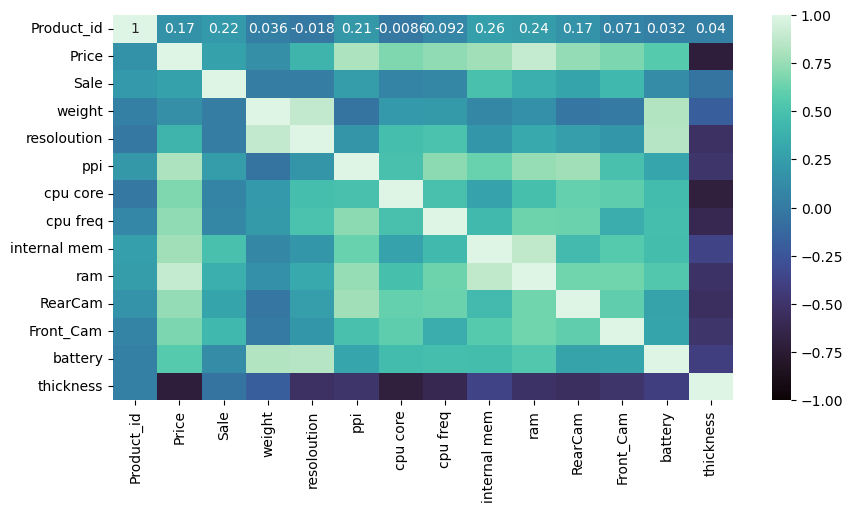

In [34]:
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

## Predicting the feature score

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
X = df.iloc[:, 0:20]
y = df.iloc[:, -1] 

In [24]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [25]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score' ]

In [26]:
featureScores

,Feature,Score
0,Product_id,2.523529e-01
1,Price,1.680014e+02
2,Sale,3.670432e-01
3,weight,5.651183e+00
4,resoloution,6.332914e+01
5,ppi,5.209962e+01
6,cpu core,1.510104e+02
7,cpu freq,9.644588e+01
8,internal mem,2.481318e+01
9,ram,5.926199e+01


### Identifying the top 10 important features

In [31]:
print(featureScores.nlargest(10,'Score'))

        Feature         Score
13    thickness  2.045921e+16
1         Price  1.680014e+02
6      cpu core  1.510104e+02
7      cpu freq  9.644588e+01
10      RearCam  6.931664e+01
4   resoloution  6.332914e+01
9           ram  5.926199e+01
5           ppi  5.209962e+01
11    Front_Cam  5.120163e+01
12      battery  3.263699e+01


### Calculate the variance

In [9]:
var = df.var(numeric_only=True)
# rounding off the values upto 3 decimals
round(var, 6)

Product_id      1.687990e+05
Price           5.901115e+05
Sale            2.392029e+06
weight          8.628294e+03
resoloution     2.279958e+00
ppi             1.817823e+04
cpu core        5.973214e+00
cpu freq        3.597390e-01
internal mem    8.297149e+02
ram             2.591557e+00
RearCam         3.821199e+01
Front_Cam       1.885343e+01
battery         1.868664e+06
thickness       4.807337e+00
dtype: float64

### Calculate the Standard Deviation

In [10]:
df.std(numeric_only=True)

Product_id       410.851583
Price            768.187171
Sale            1546.618517
weight            92.888612
resoloution        1.509953
ppi              134.826659
cpu core           2.444016
cpu freq           0.599783
internal mem      28.804773
ram                1.609831
RearCam            6.181585
Front_Cam          4.342053
battery         1366.990838
thickness          2.192564
dtype: float64

## Variance
### The variance indicates how much is the data varying from the mean.
### The output suggests that the variable cpu freq has the least variance and the variable Sale has the maximum variance.
## Standard Deviation
### We can see that the variable 'cpu freq' has a standard deviation near to zero.
### It indicates that there is not much variability.

In [23]:
# removing features that are less correlated with our target variable
df_num.corr().Price[df_num.corr().Price <= 0.05]

thickness   -0.716773
Name: Price, dtype: float64

# Plotting Boxplot

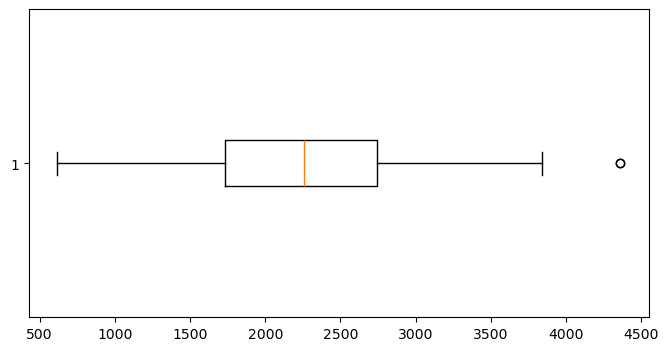

In [12]:
plt.figure(figsize=(8, 4))
plt.boxplot(x='Price', data=df, vert=False)
plt.show()

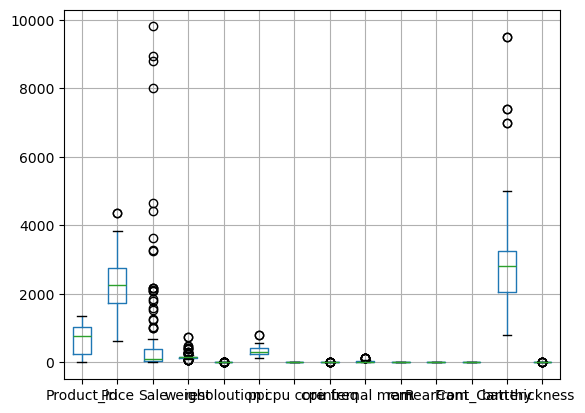

In [13]:
df_num.boxplot()
plt.show()

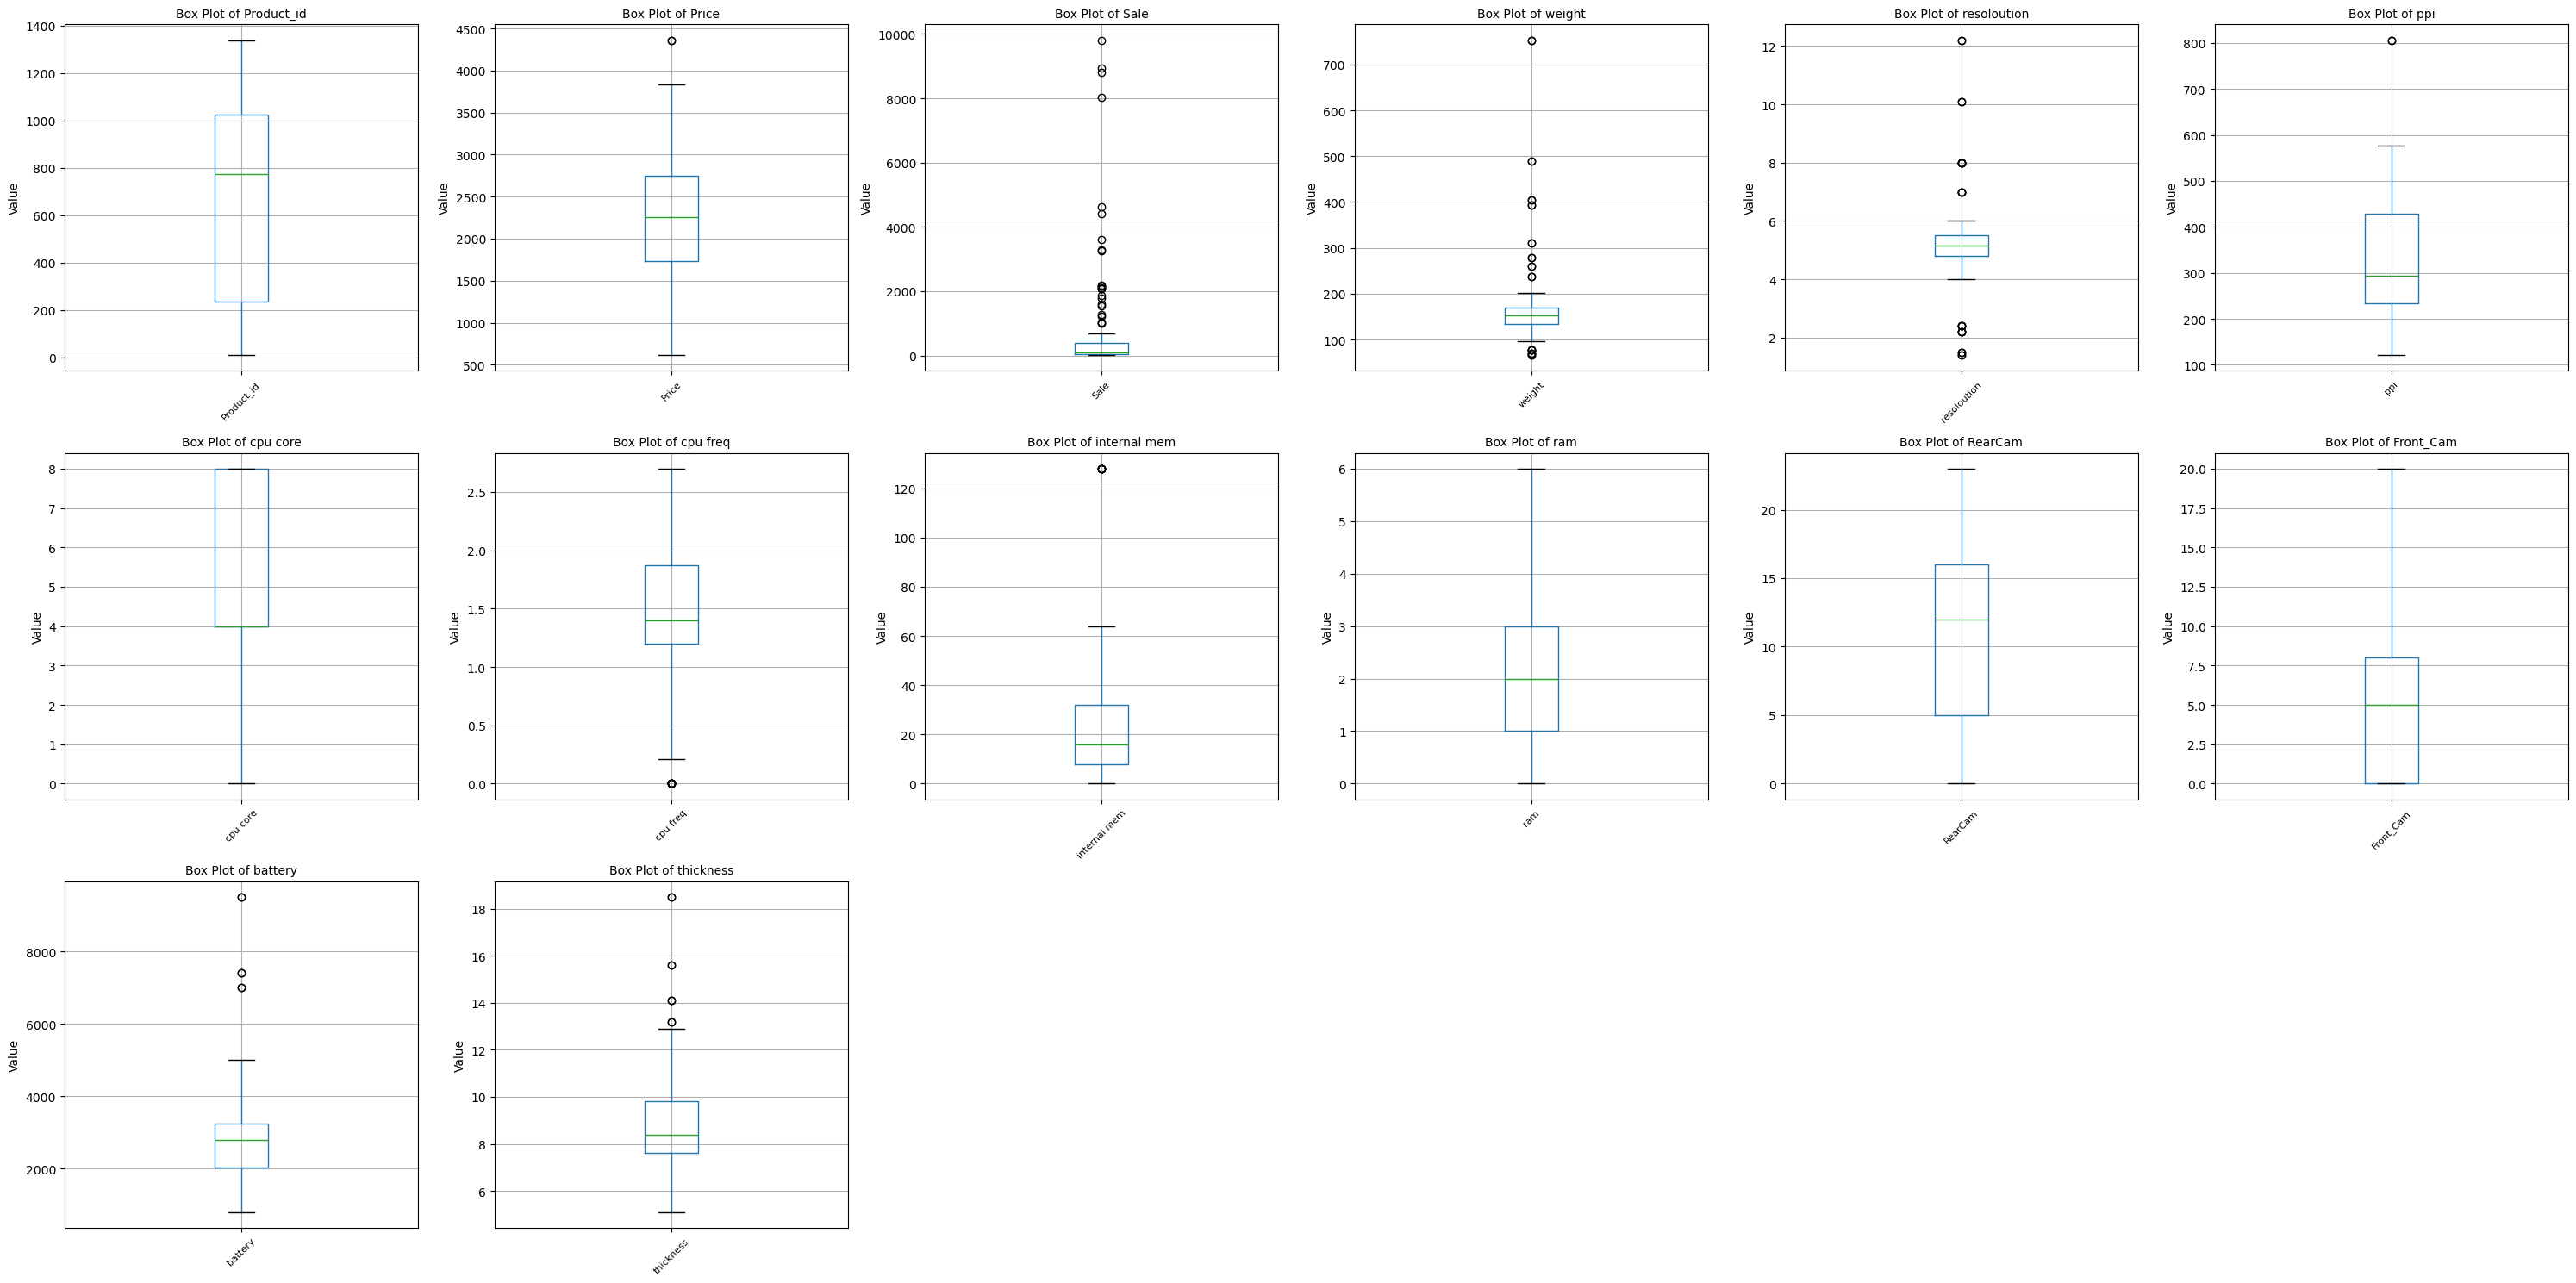

In [40]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 6  # You can adjust this to 7, 8, 9, or 10 as needed
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Set a suitable figure size
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust height and width based on n_cols and n_rows

# Loop through each numerical column to create individual box plots
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a grid of subplots
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}', fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Linear regression model

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'E:\Cellphone.csv' 
data = pd.read_csv(file_path)

# Fill missing values with the mean of the column
data_filled = data.fillna(data.mean())

# Select features and target variable
features = ['ppi', 'weight', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']
X = data_filled[features]
y = data_filled['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets prepared.")


Training and testing sets prepared.


In [36]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Model trained.")


Model trained.


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")
print(f"Training R²: {r2_train}")
print(f"Testing R²: {r2_test}")


Training MSE: 34197.673784975734
Testing MSE: 34765.77469680567
Training R²: 0.9421543729364218
Testing R²: 0.9386726981147939


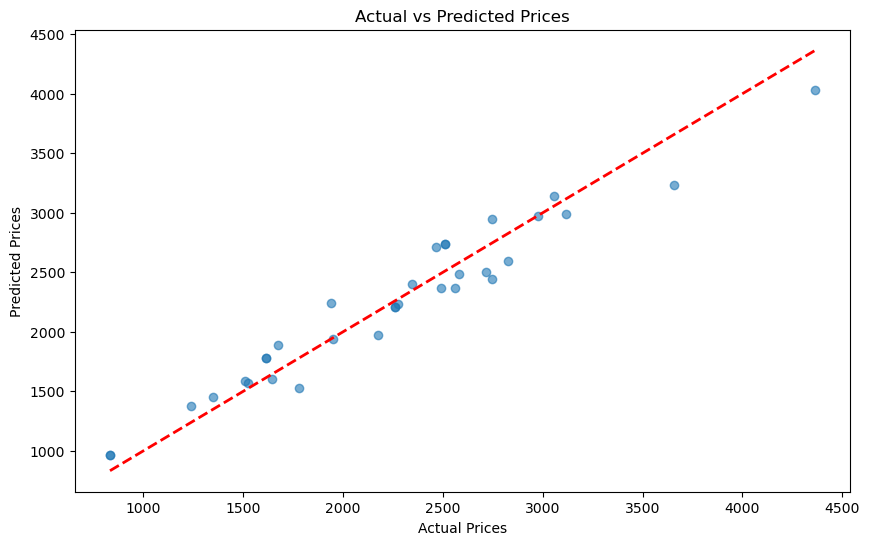

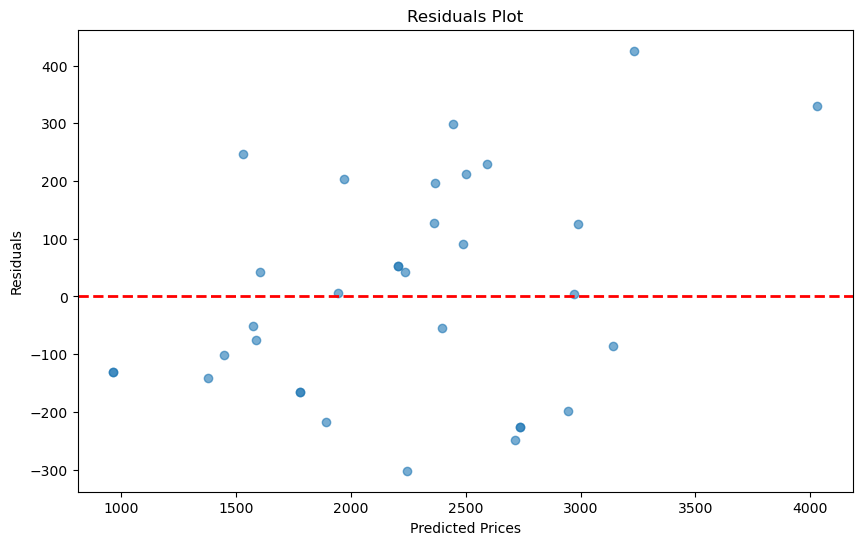

In [38]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Residual plot for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, y_test - y_pred_test, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()
